#### Introduction

In [3]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

In [4]:
zip_path = '../BD/Supermercado_mod.zip' 
csv_filename = 'Supermercado_mod.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
0,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea,Monday,Afternoon,38,21-40 order
1,1201011,147243,14,0,16,3.0,83,2,0,4,produce,fresh vegetables,Monday,Afternoon,38,21-40 order
2,1201011,147243,14,0,16,3.0,83,3,1,4,produce,fresh vegetables,Monday,Afternoon,38,21-40 order
3,1201011,147243,14,0,16,3.0,24,4,1,4,produce,fresh fruits,Monday,Afternoon,38,21-40 order
4,1201011,147243,14,0,16,3.0,120,5,1,16,dairy eggs,yogurt,Monday,Afternoon,38,21-40 order


#### Clustering - K-Means

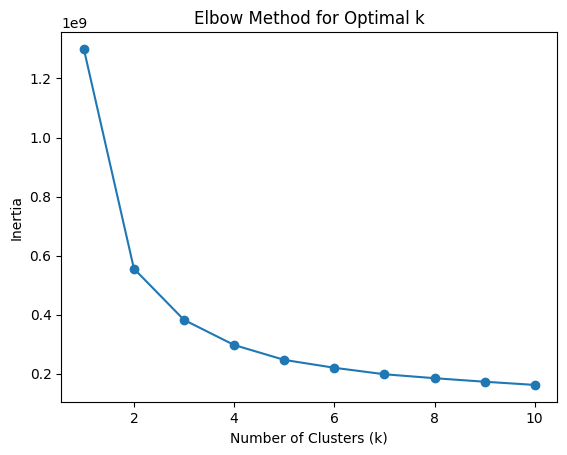

In [6]:
X = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\Matias\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


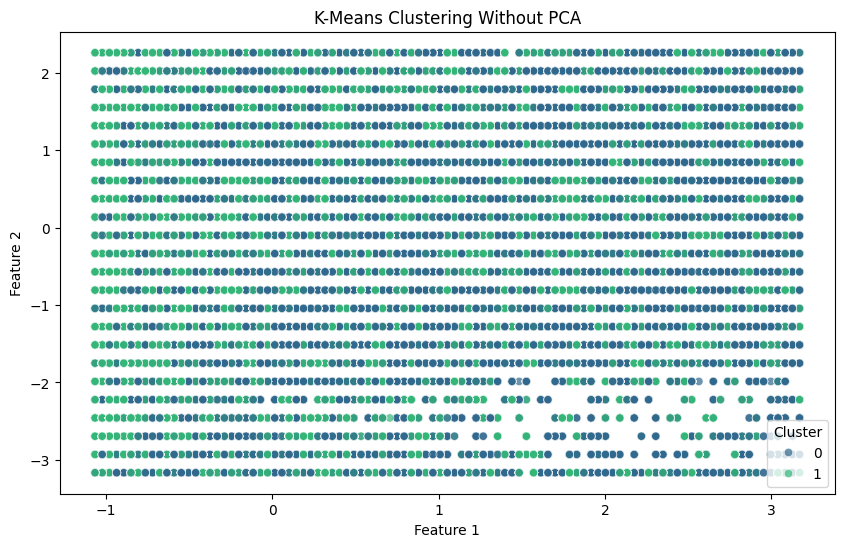

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans1 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans1.fit_predict(X_scaled)

df_c1 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
df['Clusters_1'] = kmeans1.labels_

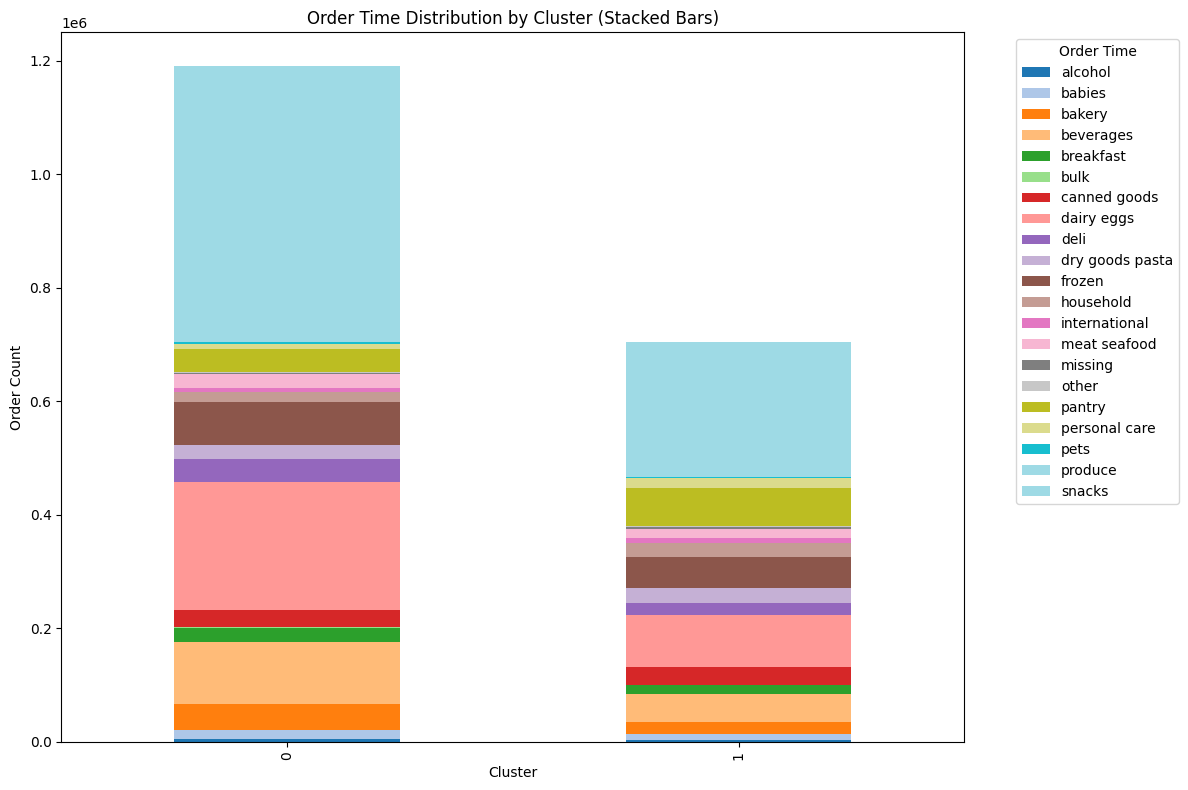

In [9]:
pivot_table = pd.crosstab(df['Clusters_1'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars)')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Time', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

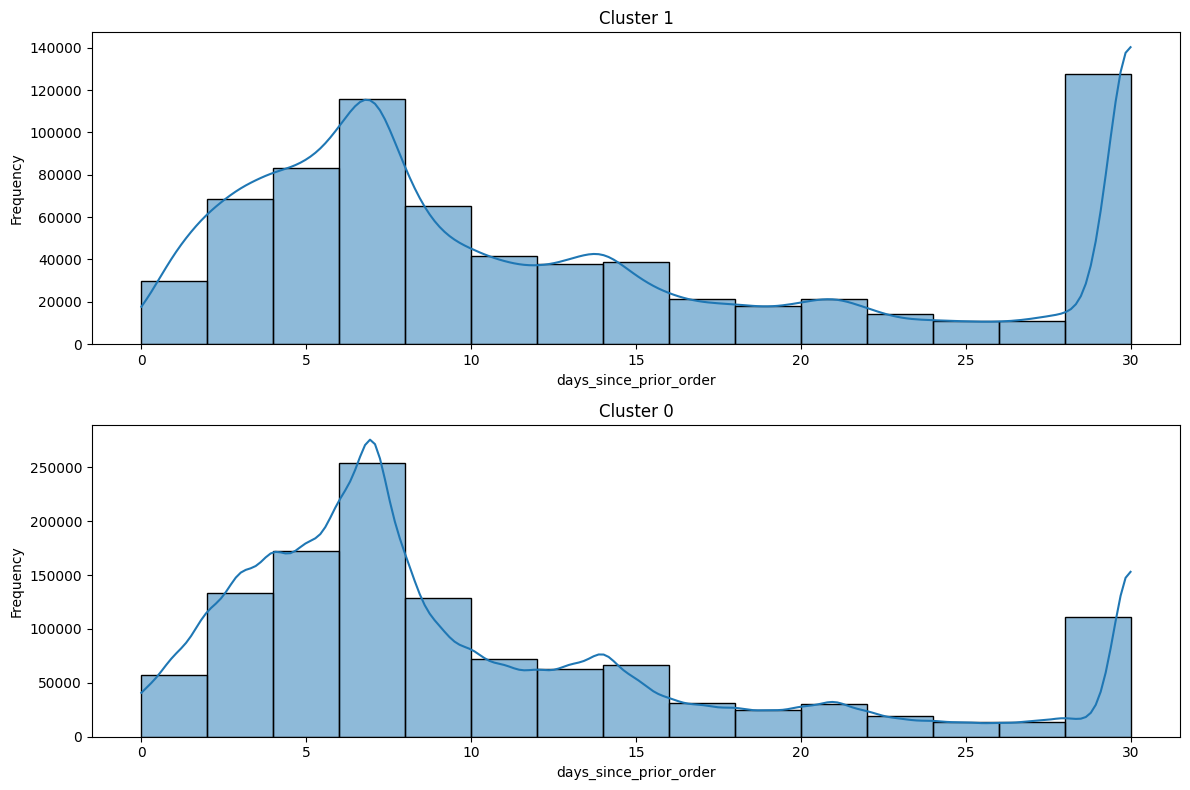

In [10]:
clusters_1 = df['Clusters_1'].unique()
n_clusters = len(clusters_1)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_1):
    sns.histplot(df[df['Clusters_1'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


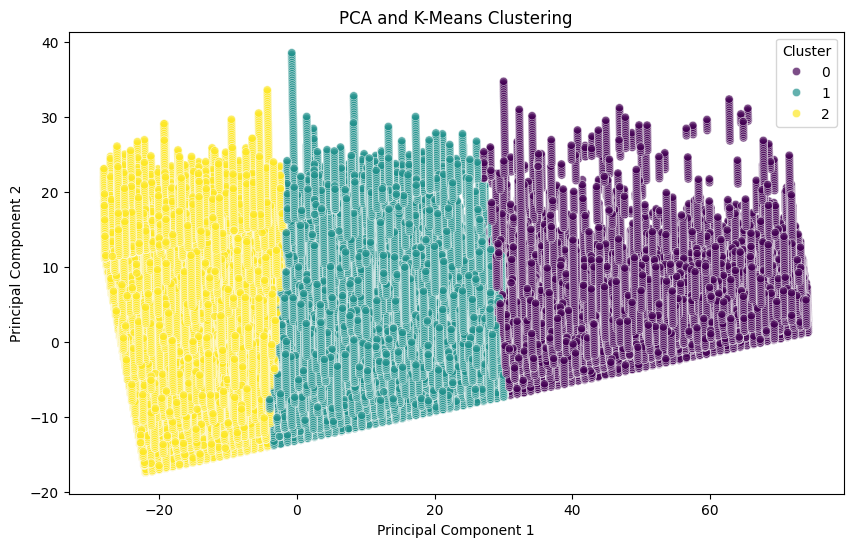

In [11]:
n_clusters = 3

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

c:\Users\Matias\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


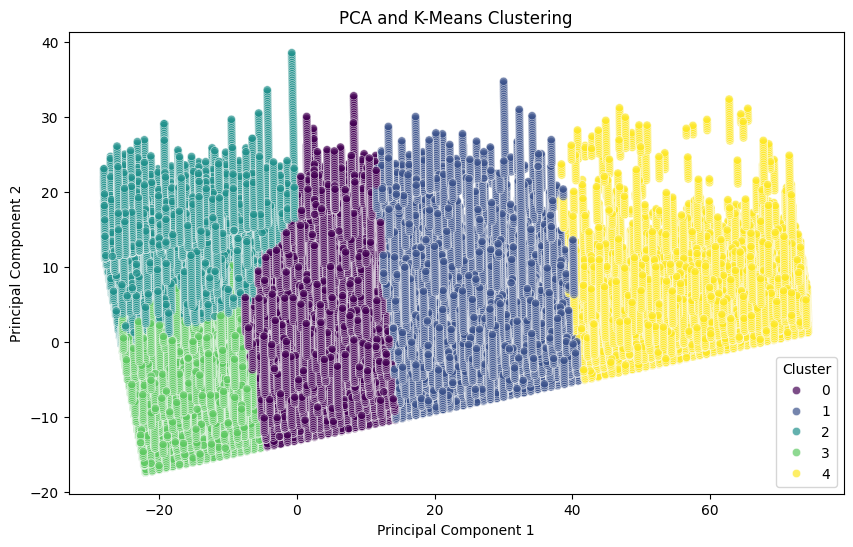

In [12]:
n_clusters = 5

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [13]:
df['Clusters_3'] = kmeans3.labels_

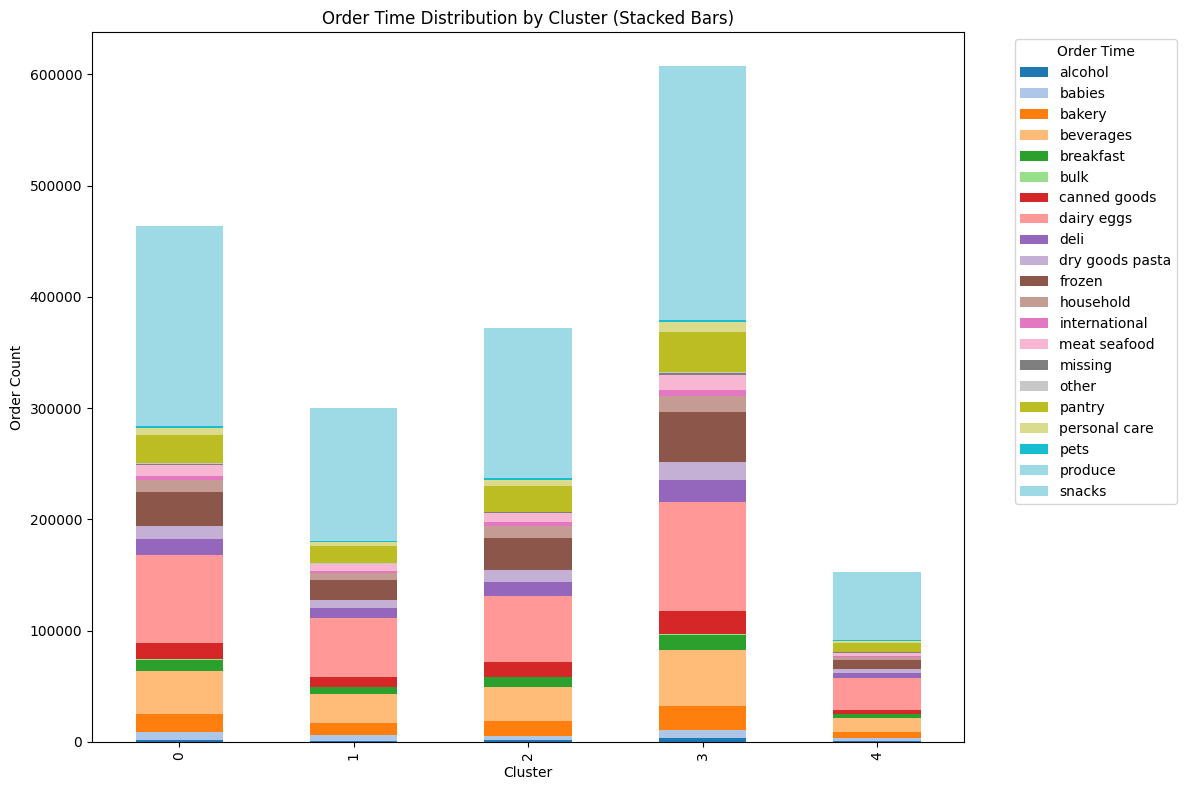

In [14]:
pivot_table = pd.crosstab(df['Clusters_3'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars)')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Time', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

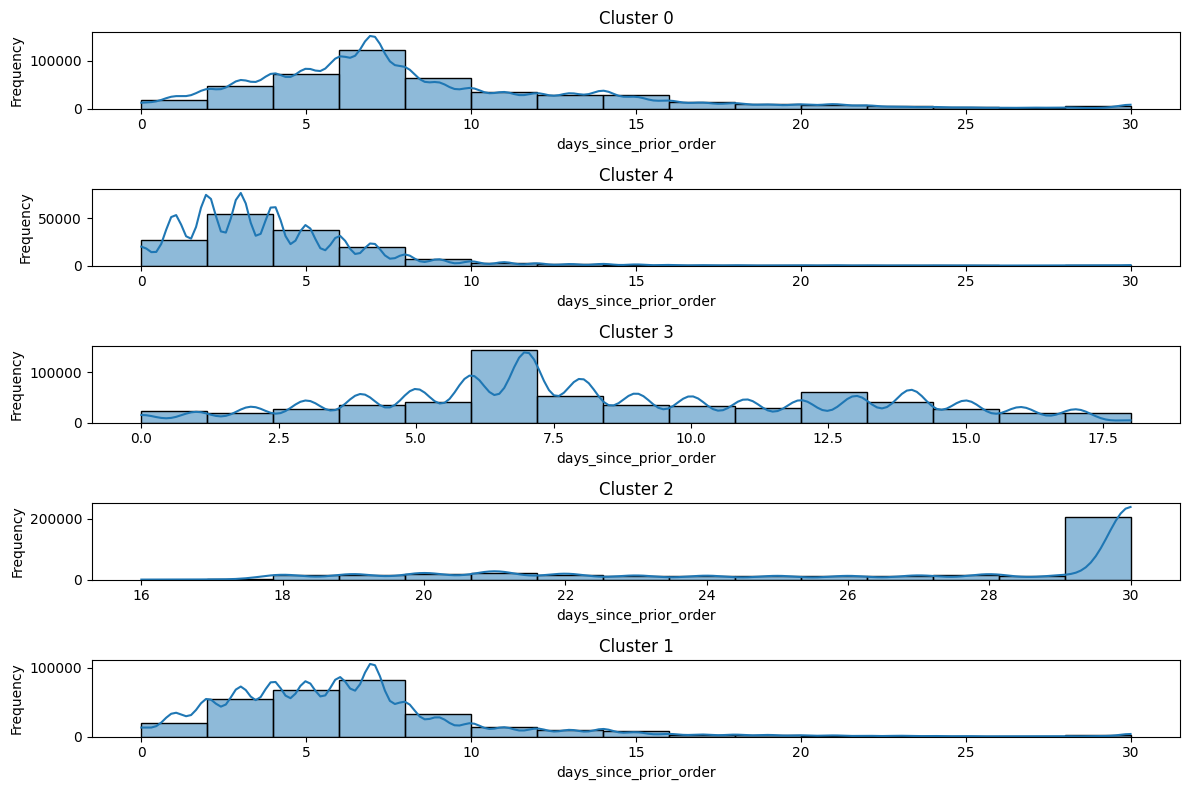

In [15]:
clusters_3 = df['Clusters_3'].unique()
n_clusters = len(clusters_3)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_3):
    sns.histplot(df[df['Clusters_3'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

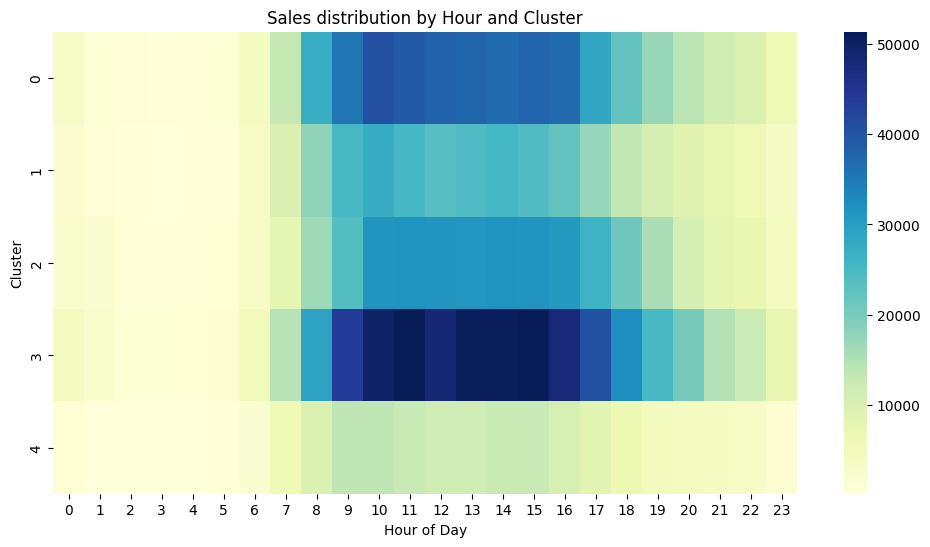

In [16]:
order_hour_counts = df.groupby(['Clusters_3', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

##### Clustering using different variables

In [19]:
X2 = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

In [20]:
X_train = X2.values

kmeans4 = KMeans(n_clusters=5, random_state=2)
kmeans4.fit(X_train)

# Get predictions
predictions = kmeans4.predict(X_train)

# Count occurrences for each cluster from 0 to 4
counts = np.bincount(predictions, minlength=5).reshape(1, 5)

# Create a DataFrame with fixed cluster names
countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,461611,300036,371979,152933,608600


Explained variance ratio (first two components): [0.87408324 0.0972555 ]


<Figure size 640x480 with 0 Axes>

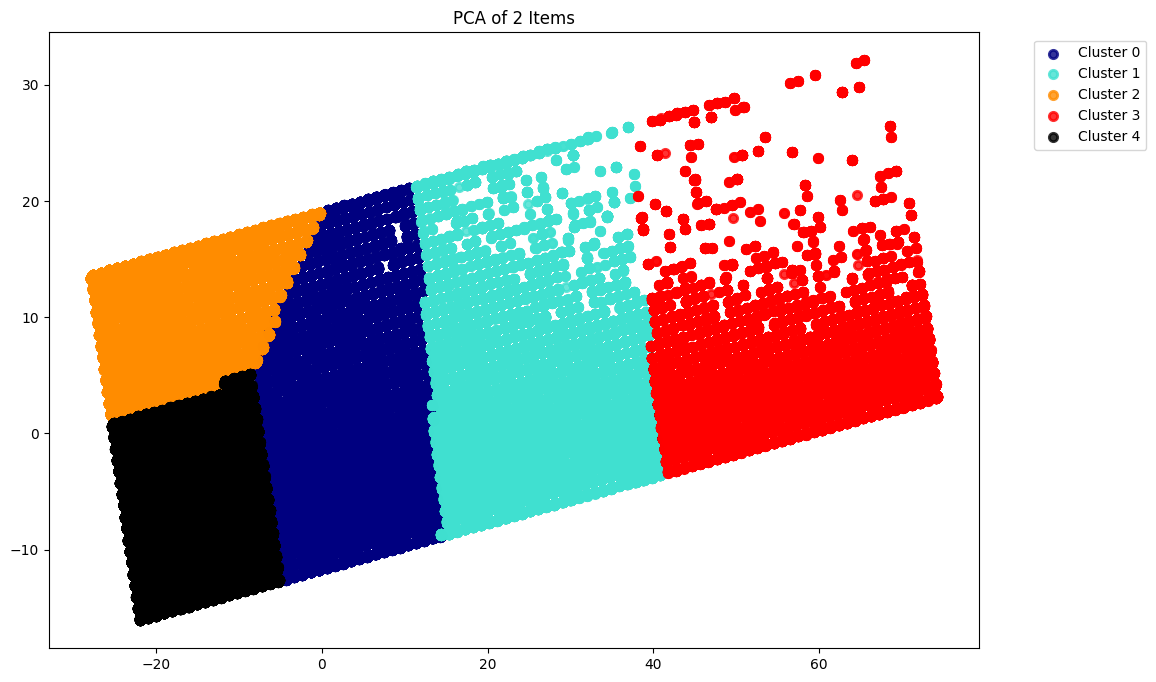

In [21]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [22]:
df['Clusters_4'] = kmeans4.labels_

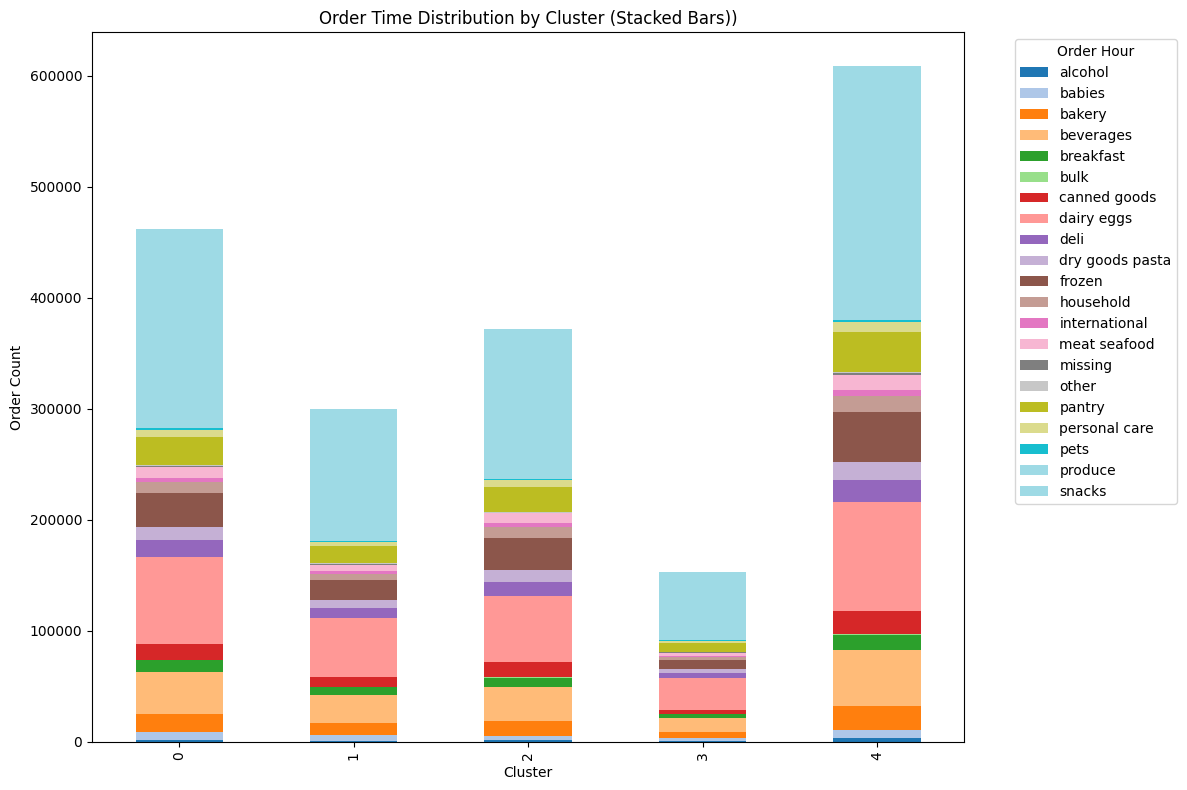

In [23]:
pivot_table = pd.crosstab(df['Clusters_4'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars))')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

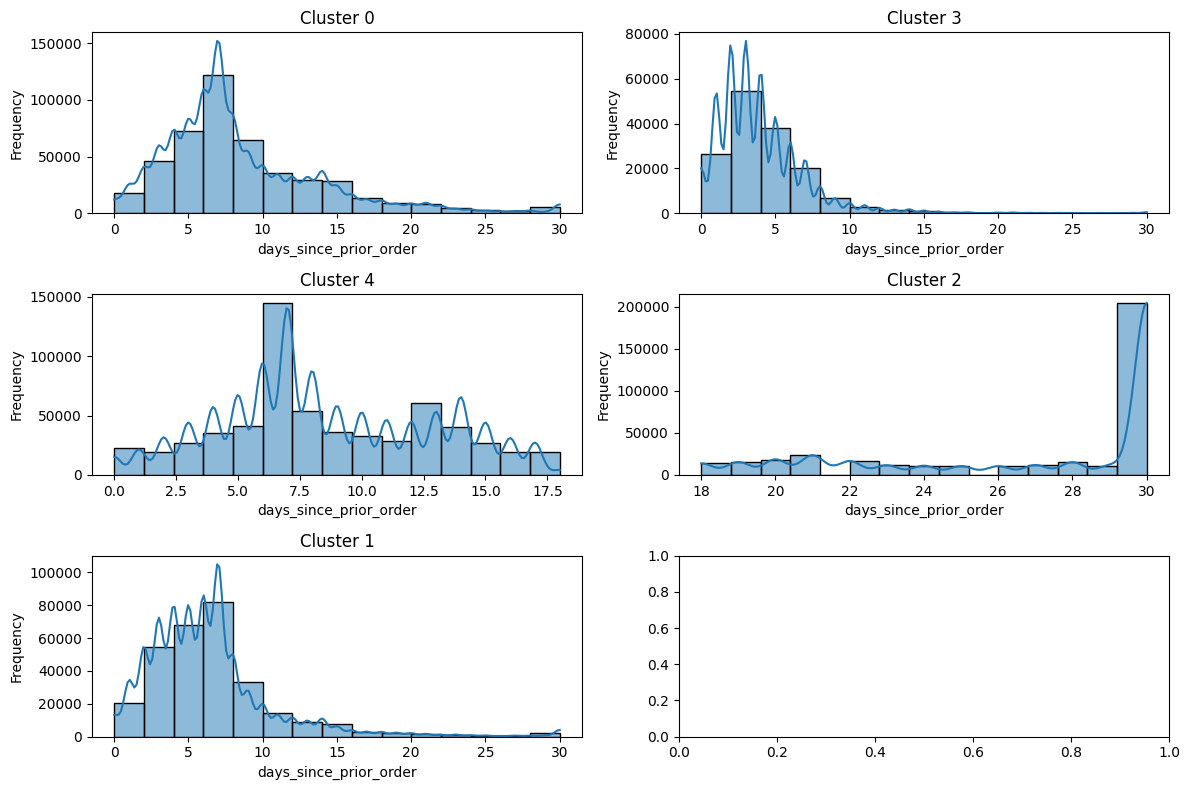

In [24]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

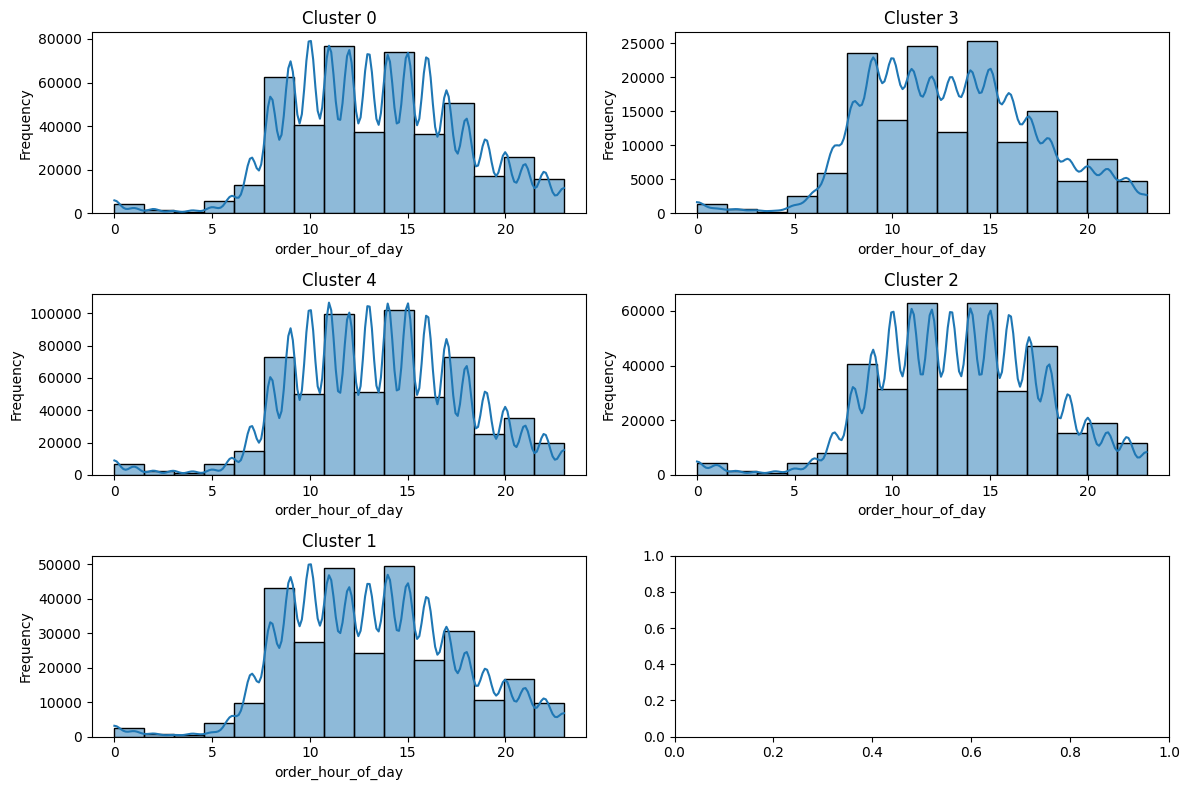

In [25]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['order_hour_of_day'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

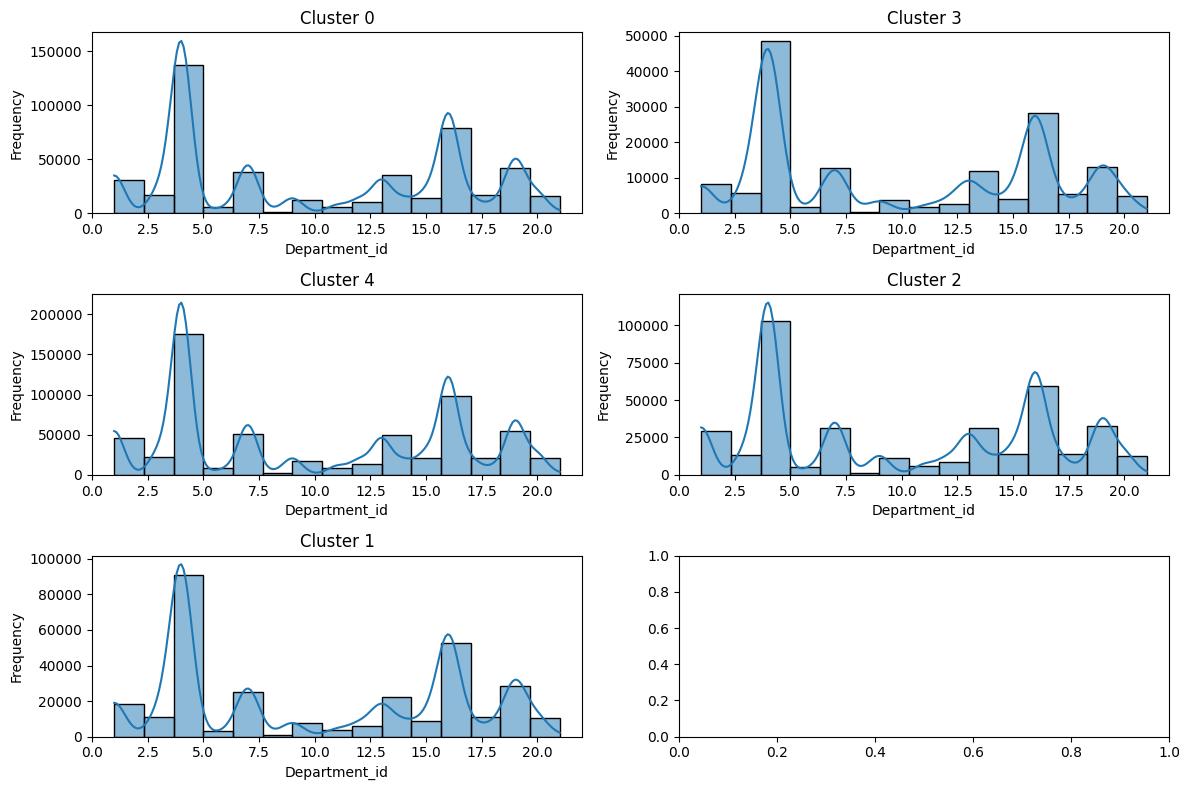

In [26]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['department_id'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('Department_id')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

--------------------------------------------------------------

### DB-SCAN

In [29]:
df_sample, _ = train_test_split(df, test_size=0.2, random_state=42, stratify=df['department'])


In [30]:
#df_sample = df.sample(frac=0.2, random_state=42)

In [31]:
df_sample_numeric = df_sample.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(df_sample_numeric)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled_sample)

df_sample['Cluster_DBSCAN'] = labels_dbscan

In [32]:
#eps = 1.5  # Comienza con un valor más alto para agrupar más puntos
#min_samples = 5  # Incrementa para requerir una mayor densidad en cada cluster

#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#labels_dbscan = dbscan.fit_predict(X_scaled_sample)

# Contar el número de clusters generados (excluyendo los puntos marcados como ruido)
#n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
#print(f'Número de clusters generados: {n_clusters}')

In [33]:
#eps = 2  # Comienza con un valor más alto para agrupar más puntos
#min_samples = 10  # Incrementa para requerir una mayor densidad en cada cluster

#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#labels_dbscan = dbscan.fit_predict(X_scaled_sample)

# Contar el número de clusters generados (excluyendo los puntos marcados como ruido)
#n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
#print(f'Número de clusters generados: {n_clusters}')

In [ ]:
df_sample_numeric = df_sample.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(df_sample_numeric)

dbscan = DBSCAN(eps=2, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled_sample)

df_sample['Cluster_DBSCAN'] = labels_dbscan

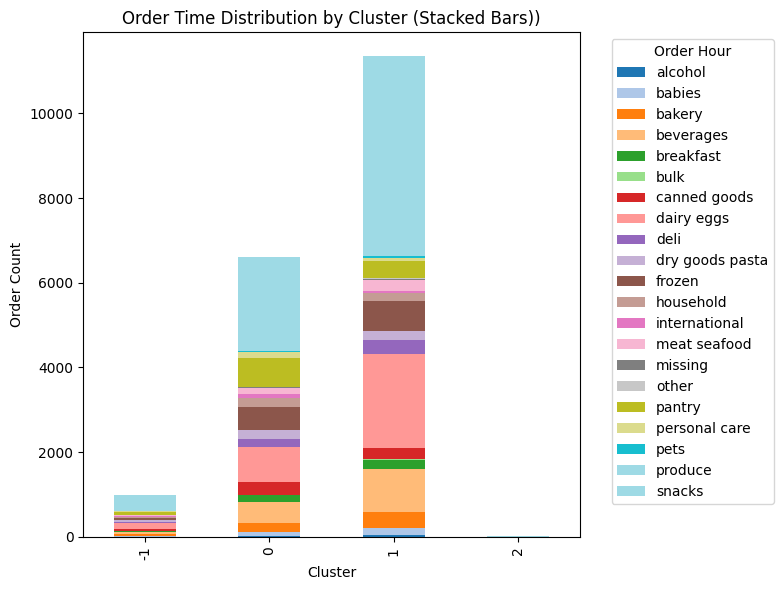

In [ ]:
pivot_table = pd.crosstab(df_sample['Cluster_DBSCAN'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars))')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

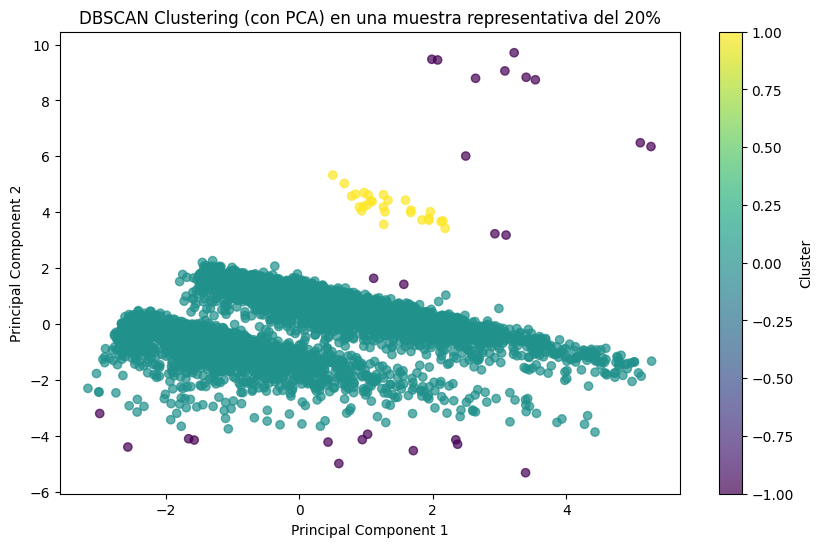

In [ ]:
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_scaled_sample)

sample_X_pca = X_pca_sample[np.random.choice(X_pca_sample.shape[0], size=5000, replace=False)]

dbscan2 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan2 = dbscan2.fit_predict(sample_X_pca)

df_dbscan2 = pd.DataFrame(sample_X_pca, columns=['PC1', 'PC2'])
df_dbscan2['Cluster'] = labels_dbscan2

plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan2['PC1'], df_dbscan2['PC2'], c=df_dbscan2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (con PCA) en una muestra representativa del 20%')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

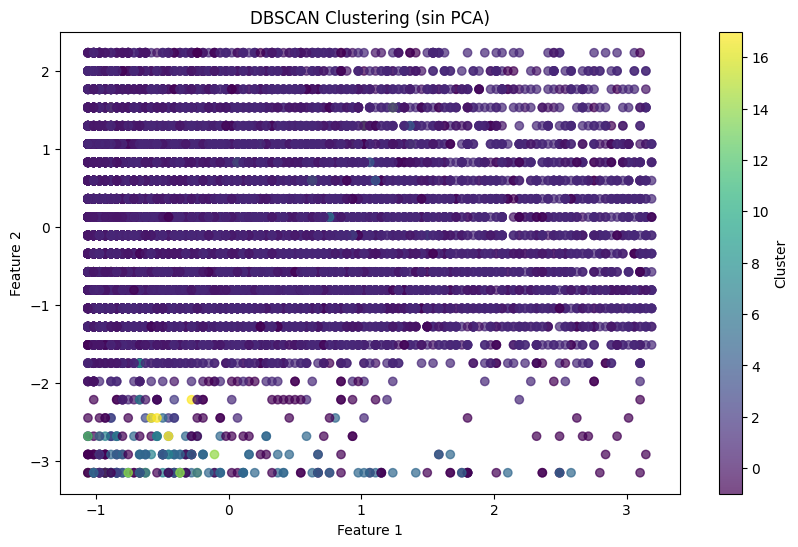

In [ ]:
X = df_sample[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan1 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan1 = dbscan1.fit_predict(X_scaled)

df_dbscan1 = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
df_dbscan1['Cluster'] = labels_dbscan1

plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan1['Feature1'], df_dbscan1['Feature2'], c=df_dbscan1['Cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (sin PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

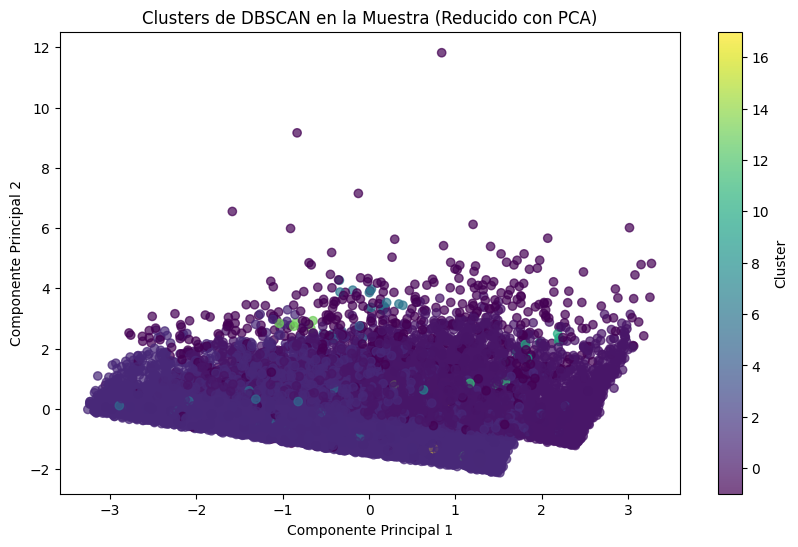

In [ ]:
df_sample = df.sample(frac=0.01, random_state=42)

X_sample = df_sample[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']]

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

dbscan_sample = DBSCAN(eps=0.5, min_samples=5)
labels_sample = dbscan_sample.fit_predict(X_sample_scaled)

df_sample['Cluster_DBSCAN'] = labels_sample

pca = PCA(n_components=2)
X_sample_pca = pca.fit_transform(X_sample_scaled)

df_sample_pca = pd.DataFrame(X_sample_pca, columns=['PC1', 'PC2'])
df_sample_pca['Cluster'] = labels_sample

plt.figure(figsize=(10, 6))
plt.scatter(df_sample_pca['PC1'], df_sample_pca['PC2'], c=df_sample_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters de DBSCAN en la Muestra (Reducido con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()